In [1]:
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression as logistic
import pandas as pd
df=pd.read_excel('/Users/ianfla/Desktop/Others/weight/weight.xlsx',engine='openpyxl',header=None)
data=df[1].values[0:-1]

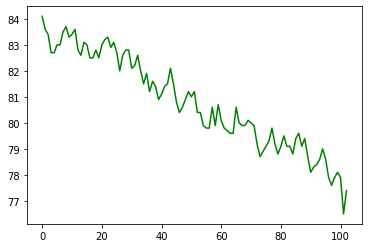

In [2]:
plt.plot(data,c='g')
plt.show()